### 03 PyTorch Computer Vision

### 0. Computer vision libraries in PyTorch 

- torchvision - base domain library for PyTorch computer vision 
- torchvision.datasets - get datasets and data loading functions for computer vision here 
- torchvision.models - get pretrained computer vision models that you can leverage for your own problems 
- torchvision.transforms - functions for manipulating your vision data (images) to be suitable for use with an ML model 
- torch.utils.data.Dataset - Base dataset class for PyTorch 
- torch.utils.data.DataLoader - Creates a Python iterable over a dataset 

In [1]:
# PyTorch 
import torch 
from torch import nn 

# torchvision 
import torchvision 
from torchvision import datasets 
from torchvision import transforms
from torchvision.transforms import ToTensor 

# matplotlib 
import matplotlib.pyplot as plt 

# Check versions 
print(torch.__version__) 
print(torchvision.__version__) 

2.3.0+cu121
0.18.0+cu121


### 1 Getting a dataset 

We're going to be using the FashionMNIST to learn computer vision in PyTorch. We can grab this data from the torchvision datasets

In [2]:
# Setup training data 
train_data = datasets.FashionMNIST(
    root="data" ,  # where to download the data 
    train=True,     # do we want the training dataset 
    download=True,  
    transform=ToTensor(),    # We want the data in tensors 
    target_transform=None  # We don't want to transform the labels/target
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [3]:
len(train_data), len(test_data) 

(60000, 10000)

In [4]:
# See the first training example 
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
image.shape, type(label)

(torch.Size([1, 28, 28]), int)

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [9]:
# Check the shape of our image 
# Image shape --> [color channel, height, width]
print(f"Image shape: {image.shape}")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28])
Image label: Ankle boot


### 1.2 Visualizing the data 

Image shape: torch.Size([1, 28, 28])
Label: Ankle boot


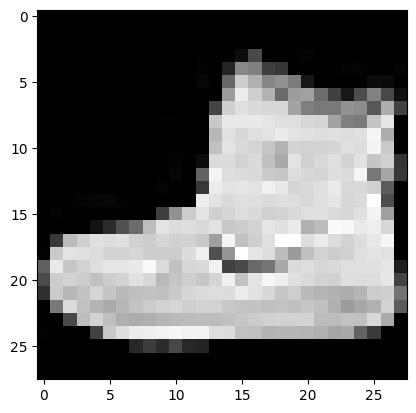

In [10]:
image, label = train_data[0]
print(f"Image shape: {image.shape}")
print(f"Label: {class_names[label]}")
plt.imshow(image.squeeze(), cmap="gray");

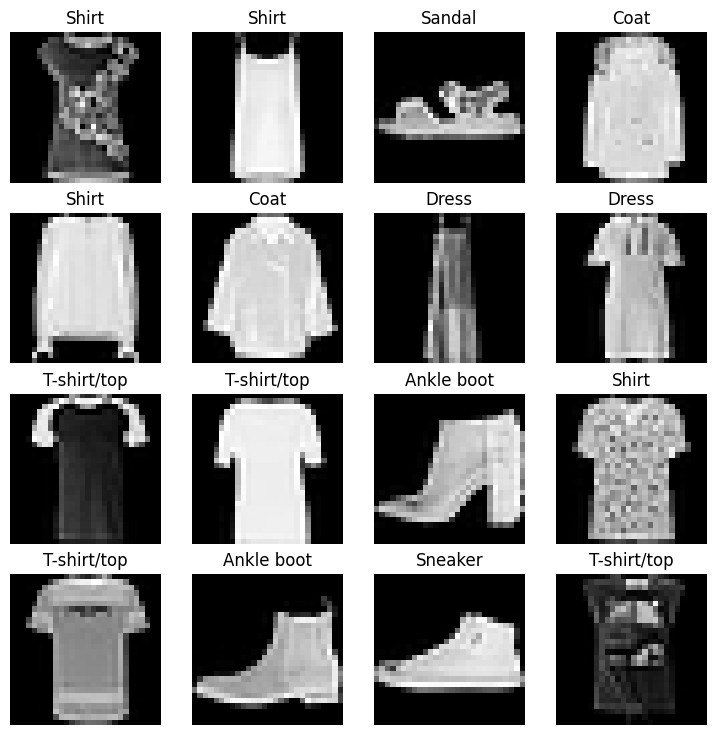

In [11]:
# Plot random images to get a feel for the data 
import random 
fig = plt.figure(figsize=(9,9)) 
rows, cols = 4, 4
for i in range(1, rows*cols + 1):
    #rand_idx = torch.randint(0, len(train_data), size=[1]).item()  Grabbing rand idx with torch, bit longer than importing random
    rand_idx = random.randint(0, len(train_data))
    img, label = train_data[rand_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray") 
    plt.title(class_names[label]) 
    plt.axis(False)

In [12]:
type(train_data)

torchvision.datasets.mnist.FashionMNIST

### 2. Prepare DataLoader 

Right now the data is a torch dataset type, but we want to convert it into a DataLoader (turn our dataset to a python iterable) 

More specifically, we want our data in batches

Batches are good because: 
1. Computational efficiency (32 images at a time instead of all 60,000 at once) 
2. Gives our neural network more chances to update its gradients per epoch 

Look up more on mini-batch gradient descent 

In [13]:
# Turn train dataset into iterables (batches)  
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=32,
                             shuffle=False)  

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x202c88817d0>,
 <torch.utils.data.dataloader.DataLoader at 0x202c874ca90>)

In [14]:
# Checking out what we've created 
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)}, Batch size: {train_dataloader.batch_size}")
print(f"Length of test_dataloader: {len(test_dataloader)}, Batch size: {test_dataloader.batch_size}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x00000202C88817D0>, <torch.utils.data.dataloader.DataLoader object at 0x00000202C874CA90>)
Length of train_dataloader: 1875, Batch size: 32
Length of test_dataloader: 313, Batch size: 32


So instead of having the model view all 60,000 training images at once, we have 1875 batches, each with 32 images 

In [15]:
# Check out whats inside the training dataloader 
train_features_batch, train_labels_batch = next(iter(train_dataloader)) 
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [16]:
len(train_features_batch), len(train_labels_batch)

(32, 32)

Image size: torch.Size([1, 28, 28])
Label: 7, Label size: torch.Size([])


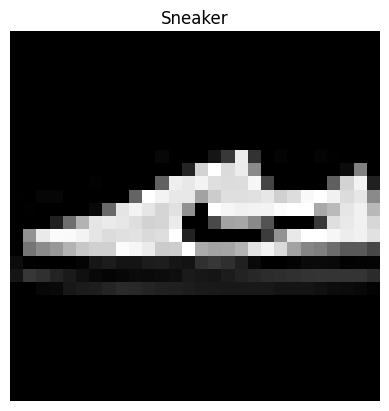

In [17]:
# Show a sample
rand_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[rand_idx], train_labels_batch[rand_idx]
plt.imshow(img.squeeze(), cmap="gray") 
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, Label size: {label.shape}")

### 3. Model 0: Baseline model

When starting to a build a series of machine learning modelling experiments, it's best practice to begin with a baseline model 

Start simple and add complexity as needed 

In [18]:
# Create a flatten layer 
flatten_model  = nn.Flatten() 

# Get a single sample 
x = train_features_batch[0]
print(f"Original shape: {x.shape}")
print(f"After flatten: {flatten_model(x).shape}")

Original shape: torch.Size([1, 28, 28])
After flatten: torch.Size([1, 784])


In [19]:
28 * 28 

784

In [20]:
device = "cuda" if torch.cuda.is_available() else "cpu" 

In [21]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.layer_stack(x) 

In [22]:
baseline_model = FashionMNISTModelV0(input_shape=784, 
                                     hidden_units=10, 
                                     output_shape=len(class_names))

baseline_model

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [23]:
next(baseline_model.parameters()).device

device(type='cpu')

In [24]:
# Cool way to test model output
dummy_x = torch.rand([1, 1, 28, 28])
baseline_model(dummy_x)

tensor([[-0.0988,  0.1363,  0.3653,  0.0235,  0.0499,  0.0429,  0.3854, -0.4388,
          0.0843, -0.1753]], grad_fn=<AddmmBackward0>)

We get a one logit output per class

### 3.1 setup loss, optimizer, and evaluation metrics 

- Loss function - since we're working with multi-class data, we'll use CrossEntropyLoss()
- Optimizer - SGD or Adam 
- Evaluation metrics --> accuracy function 


In [25]:
import requests
from pathlib import Path 

if Path("helper_functions.py").is_file():
    print("helper_functions.py already downloaded.. Skipping download") 
else:
    print("Downloading helper_functions.py") 
    req = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f: 
        f.write(req.content) 

helper_functions.py already downloaded.. Skipping download


In [26]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    return (correct / len(y_pred)) * 100 

In [27]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=baseline_model.parameters(), lr = 0.1)

### 3.2 Creating a function to time our experiments 

Machine learning is very experimental.

Two of the main things you'll often want to track are: 
1. Model's performance (loss/accuracy values) 
2. How fast it runs

In [28]:
from timeit import default_timer as timer 
def print_train_time(start, end, device: torch.device = None): 
    """Prints difference between start and end time"""
    total_time = end - start 
    print(f"Train time on {device}: {total_time:.3f}seconds")
    return total_time

In [29]:
start_time = timer()
# some code... 
end_time = timer() 
print_train_time(start_time, end_time, device)


Train time on cuda: 0.000seconds


1.1100000847363845e-05

### 3.3 Creating a training loop and training a model on batches of data 

1. Loop through range of epochs 
2. Loop through training batches, perform training steps, calc train loss *per batch*
3. Loop through testing batches, perform testing steps, calc test loss *per batch* 
4. Print out what's happenin' 
5. Time it all (for fun) 

In [30]:
# tqdm for progress bar (fun open  source library)
from tqdm.auto import tqdm 

# Set seed & start timer 
torch.manual_seed(42) 
train_time_start_on_cpu = timer() 

# Set number of epochs (keeping it small for faster experiments) 
epochs = 3

# Begin loop 
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")
    # Training
    train_loss = 0 
    # Add loop to go through training batches 
    for batch, (X, y) in enumerate(train_dataloader):
        baseline_model.train() 
        # Forward pass
        y_pred = baseline_model(X) 
        
        # Calculate the loss (per batch) 
        loss = loss_fn(y_pred, y) 
        train_loss += loss 

        # Rest of the training loop
        optimizer.zero_grad()
        loss.backward() 
        optimizer.step() 

        # Print 
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples")
    
    # Divide total train loss by length of train dataloader 
    train_loss /= len(train_dataloader) 

    # Testing
    test_loss, test_acc = 0, 0 
    baseline_model.eval() 
    with torch.inference_mode(): 
        for X_test, y_test in test_dataloader: 
            # Forward pass 
            test_pred = baseline_model(X_test)
            # Calc loss (accumlatively) & accuracy 
            test_loss += loss_fn(test_pred, y_test) 
            test_acc += accuracy_fn(y_test, test_pred.argmax(dim=1)) 
    
        # Calculate test loss average per batch 
        test_loss /= len(test_dataloader) 

        # Calculate test acc average per batch 
        test_acc /= len(test_dataloader) 
    
    # Print what's happenin 
    print(f"\nTrain Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | Test acc: {test_acc:.2f}%")

    # Calculate training time 
    train_time_end_on_cpu = timer() 
    total_train_time_baseline_model = print_train_time(train_time_start_on_cpu, train_time_end_on_cpu, str(next(baseline_model.parameters()).device)) 

c:\Users\brandon\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples


 33%|███▎      | 1/3 [00:06<00:12,  6.48s/it]


Train Loss: 0.5943 | Test Loss: 0.5183 | Test acc: 81.62%
Train time on cpu: 6.480seconds
Epoch: 1
------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples


 67%|██████▋   | 2/3 [00:12<00:06,  6.45s/it]


Train Loss: 0.4805 | Test Loss: 0.4804 | Test acc: 83.15%
Train time on cpu: 12.914seconds
Epoch: 2
------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples


100%|██████████| 3/3 [00:19<00:00,  6.46s/it]


Train Loss: 0.4579 | Test Loss: 0.4816 | Test acc: 83.38%
Train time on cpu: 19.386seconds


### 4. Make predictions and get baseline model results 

In [31]:
import torch.utils
import torch.utils.data

torch.manual_seed(42) 
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary  containing results of model predicting on data_loader"""
    loss, acc = 0, 0 
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader: 
            # Make predictions 
            y_pred = model(X) 

            # Accumulate loss and acc values per batch 
            loss += loss_fn(y_pred, y) 
            acc += accuracy_fn(y, y_pred.argmax(dim=1))
        
        # Scale loss and acc to find average loss/acc per batch
        loss /= len(data_loader) 
        acc /= len(data_loader)
    
    return{"model_name": model.__class__.__name__, 
                "model_loss": loss.item(),
                "model_acc": acc}

# Calculate baseline model results on test dataset 
baseline_model_results = eval_model(baseline_model, 
                                                                test_dataloader,
                                                                loss_fn,
                                                                accuracy_fn)

baseline_model_results        

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4815533459186554,
 'model_acc': 83.37659744408946}

### 5. Setup device agnostic code 

In [32]:
# Setup device agnostic code 
import torch 
device = "cuda" if torch.cuda.is_available() else "cpu" 
device 

'cuda'

### 6. Model 1: Building a model with non-linearity 

We learned about the power of non-linearity in notebook 02 with the make_circles dataset. 

In [33]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self, 
                 input_shape: int, 
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU(),
        )

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.layer_stack(x) 

In [34]:
torch.manual_seed(42) 
model_1 = FashionMNISTModelV1(784, 10, len(class_names)).to(device)

In [35]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [36]:
# remaking loss_fn and optimizer (same as baseline model)
# I guess the optimizer needs to use the specific model params  
loss_fn = nn.CrossEntropyLoss() 
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1) 

### 6.2 Functionizing training and evaluation/tesing loops

In [37]:
# Making a function for train loop
import torch.utils
import torch.utils.data


def train_step(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    
    train_loss, train_acc = 0, 0
    model.to(device) 
    model.train()

    # Put data on target device 
    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device) 
        
        train_preds = model(X)
        loss = loss_fn(train_preds, y)
        train_loss += loss
        train_acc += accuracy_fn(y, train_preds.argmax(dim=1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
# Divide total train loss and accuracy by length of train data loader 
    train_loss /= len(data_loader) 
    train_acc /= len(data_loader) 
    print(f"Train loss: {train_loss:.4f} | Train acc: {train_acc:.2f}%")
    

In [38]:
def test_step(model: torch.nn.Module,
                        data_loader: torch.utils.data.DataLoader,
                        loss_fn: torch.nn.Module,
                        accuracy_fn,
                        device: torch.device = device):
    test_loss, test_acc = 0, 0 
    model.to(device) 
    model.eval() 
    with torch.inference_mode(): 
        for X, y in data_loader: 
            X, y = X.to(device), y.to(device)
            # Forward pass (outputs raw logits)  
            test_pred = model(X) 
            # Calc loss (accumlatively) & accuracy 
            test_loss += loss_fn(test_pred, y) 
            test_acc += accuracy_fn(y, test_pred.argmax(dim=1)) # go from logits --> pred labels
    
        # Calculate test loss & accuracy average per batch 
        test_loss /= len(data_loader) 
        test_acc /= len(data_loader) 
    
    # Print what's happenin 
    print(f"Test Loss: {test_loss:.4f} | Test acc: {test_acc:.2f}%\n")

In [39]:
from timeit import default_timer as timer 
def print_train_time(start, end, device: torch.device = None): 
    """Prints difference between start and end time"""
    total_time = end - start 
    print(f"Train time on {device}: {total_time:.3f}seconds")
    return total_time

In [40]:
torch.manual_seed(42) 

train_time_start_on_gpu = timer()
epochs =  3
for epoch in range(epochs):
    print(f"Epoch: {epoch}\n----------")
    train_step(model_1, train_dataloader, loss_fn, optimizer, accuracy_fn)
    test_step(model_1, test_dataloader, loss_fn, accuracy_fn) 

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(train_time_start_on_gpu, train_time_end_on_gpu, device)


Epoch: 0
----------
Train loss: 1.0920 | Train acc: 61.34%
Test Loss: 0.9564 | Test acc: 65.00%

Epoch: 1
----------
Train loss: 0.7810 | Train acc: 71.93%
Test Loss: 0.7223 | Test acc: 73.91%

Epoch: 2
----------
Train loss: 0.6703 | Train acc: 75.94%
Test Loss: 0.6850 | Test acc: 75.02%

Train time on cuda: 13.609seconds


In [41]:
torch.manual_seed(42) 

epochs = 3 
for epoch in range(epochs):
    print(f"Epoch: {epoch}\n-----")
    train_step(baseline_model, train_dataloader, loss_fn, optimizer, accuracy_fn) 
    test_step(baseline_model, test_dataloader, loss_fn, accuracy_fn) 

Epoch: 0
-----
Train loss: 0.4351 | Train acc: 84.81%
Test Loss: 0.4816 | Test acc: 83.38%

Epoch: 1
-----
Train loss: 0.4351 | Train acc: 84.81%
Test Loss: 0.4816 | Test acc: 83.38%

Epoch: 2
-----
Train loss: 0.4351 | Train acc: 84.81%
Test Loss: 0.4816 | Test acc: 83.38%



### Grabbing model evaluations 

We have our eval_model function a bit higher in the notebook here, but the problem is that the data is on the cpu and we put our model on the gpu. 

It does work to just move the model to the cpu when you call the function, or we can handle it by remaking the function with device agnostic code (which is cooler) 

In [42]:
# Bringing down the eval model function 
import torch.utils
import torch.utils.data

torch.manual_seed(42) 
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
    """Returns a dictionary  containing results of model predicting on data_loader"""
    loss, acc = 0, 0 
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader: 
            ### ADDED: Make data device agnostic ###
            X.to(device), y.to(device)
            # Make predictions 
            y_pred = model(X) 

            # Accumulate loss and acc values per batch 
            loss += loss_fn(y_pred, y) 
            acc += accuracy_fn(y, y_pred.argmax(dim=1))
        
        # Scale loss and acc to find average loss/acc per batch
        loss /= len(data_loader) 
        acc /= len(data_loader)
    
    return{"model_name": model.__class__.__name__, 
                "model_loss": loss.item(),
                "model_acc": acc}

In [44]:
device

'cuda'

In [45]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [43]:
model_1_results = eval_model(model_1, test_dataloader, loss_fn, accuracy_fn, device) 
model_1_results

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

In [ ]:
baseline_model_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4797831177711487,
 'model_acc': 83.47643769968052}

### Model 2: Building a Convolutional Neural Network (CNN) 

CNN's are also called ConvNets 

They are known for their capabilities to find patterns in visual data 

In [46]:
# Create a convolutional neural network 
class FashionMNISTModelV2(nn.Module):
    """ Model architecture that replicates the TinyVGG model from CNN
         Explainer website """
    def __init__(self,
                        input_shape: int,
                        hidden_units: int,
                        output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                            out_channels=hidden_units,
                            kernel_size=3,
                            stride=1,
                            padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                            out_channels=hidden_units,
                            kernel_size=3,
                            stride=1,
                            padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        ) 
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                            out_channels=hidden_units,
                            kernel_size=3,
                            stride=1,
                            padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                              out_channels=hidden_units,
                              kernel_size=3,
                              stride=1,
                              padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units* 0,   # There is a trick to calculating this.. 0 placeholder
                            out_features=output_shape)
        )
    
    def forward(self, x:torch.Tensor) -> torch.Tensor: 
        x = self.conv_block_1(x)
        print(x.shape) 
        x = self.conv_block_2(x) 
        print(x.shape) 
        x = self.classifier_layer(x) 
        return x

In [47]:
image.shape

torch.Size([1, 28, 28])

Our images have one color channel because they are all black and white. This is the input shape for the Conv2D layer. If we had colored images, we would use an input shape of 3, because RGB 

In [48]:
torch.manual_seed(42) 
model_2 = FashionMNISTModelV2(input_shape=1, 
                                                        hidden_units=10, 
                                                        output_shape=len(class_names)).to(device) 

c:\Users\brandon\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\init.py:452: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


### 7.1 Stepping through nn.Conv2d() 